<a href="https://colab.research.google.com/github/Priyam145/MLprojects/blob/main/notebooks/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


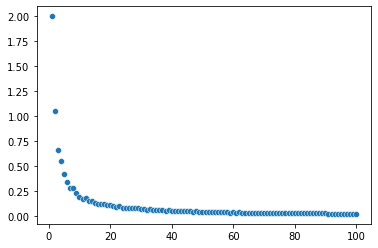

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

0.09671546166945498
0.09774467753199505
0.09708229011881532
0.10526151571797987
0.10086373214110543
0.10329546001224928
0.10500789969130414
0.1006309157204729
0.0993270473491708
0.10372031201167892


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


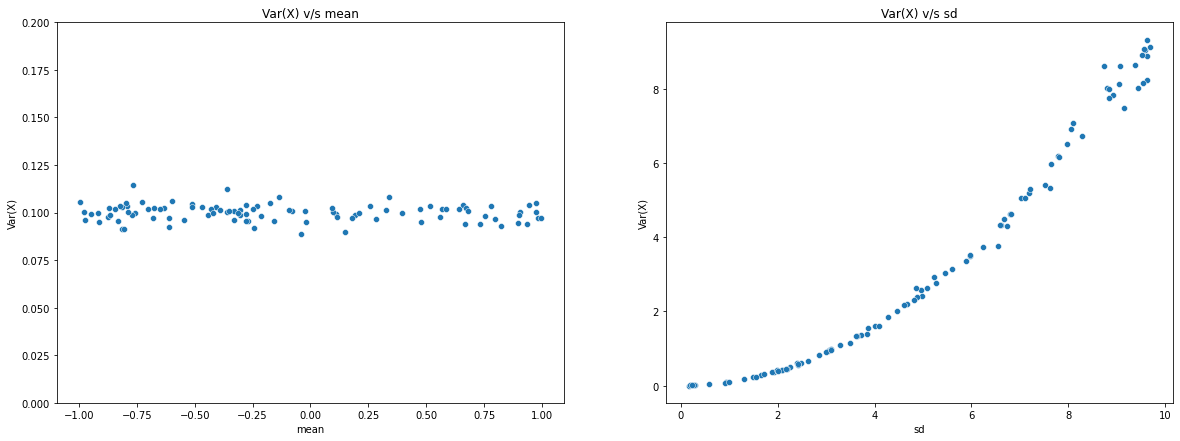

In [2]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean, )
    if id<10:
        print(variance_variable_mean[id])

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')
axs[0].set_ylim((0.0, 0.2))

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [3]:
from scipy.stats import norm
from math import sqrt

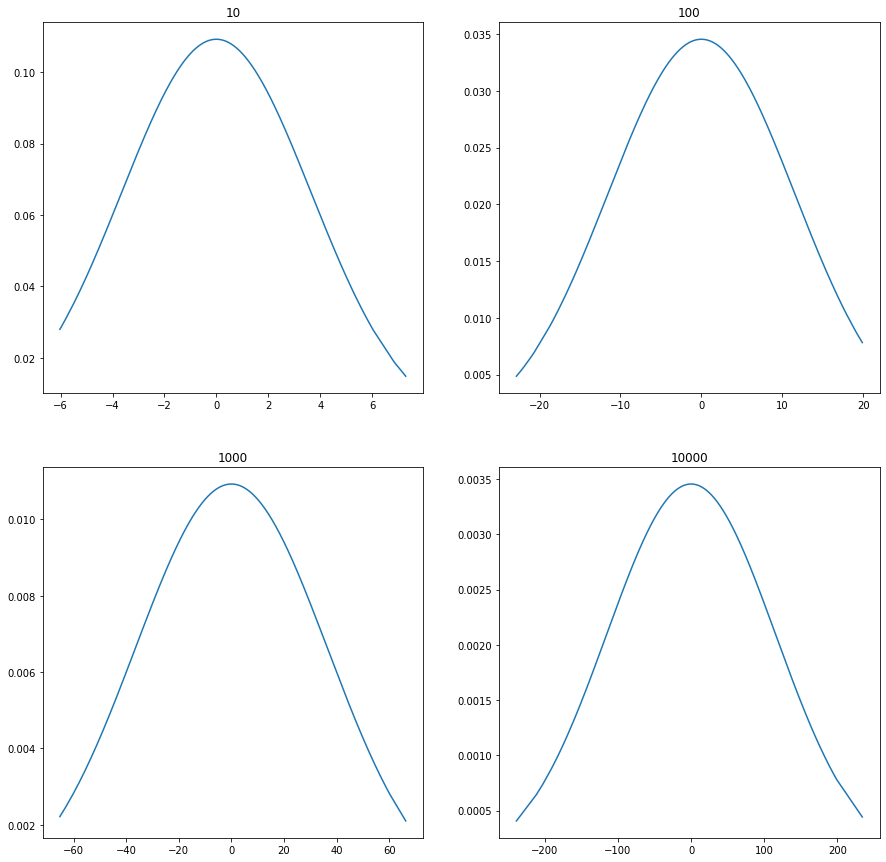

In [4]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6  i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [5]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [6]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[5 4 6]
 [4 3 3]
 [5 2 2]
 [1 3 3]
 [5 6 4]
 [3 6 5]
 [3 3 4]
 [3 2 3]
 [1 6 5]
 [2 3 3]]


(1000, 3)

In [7]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

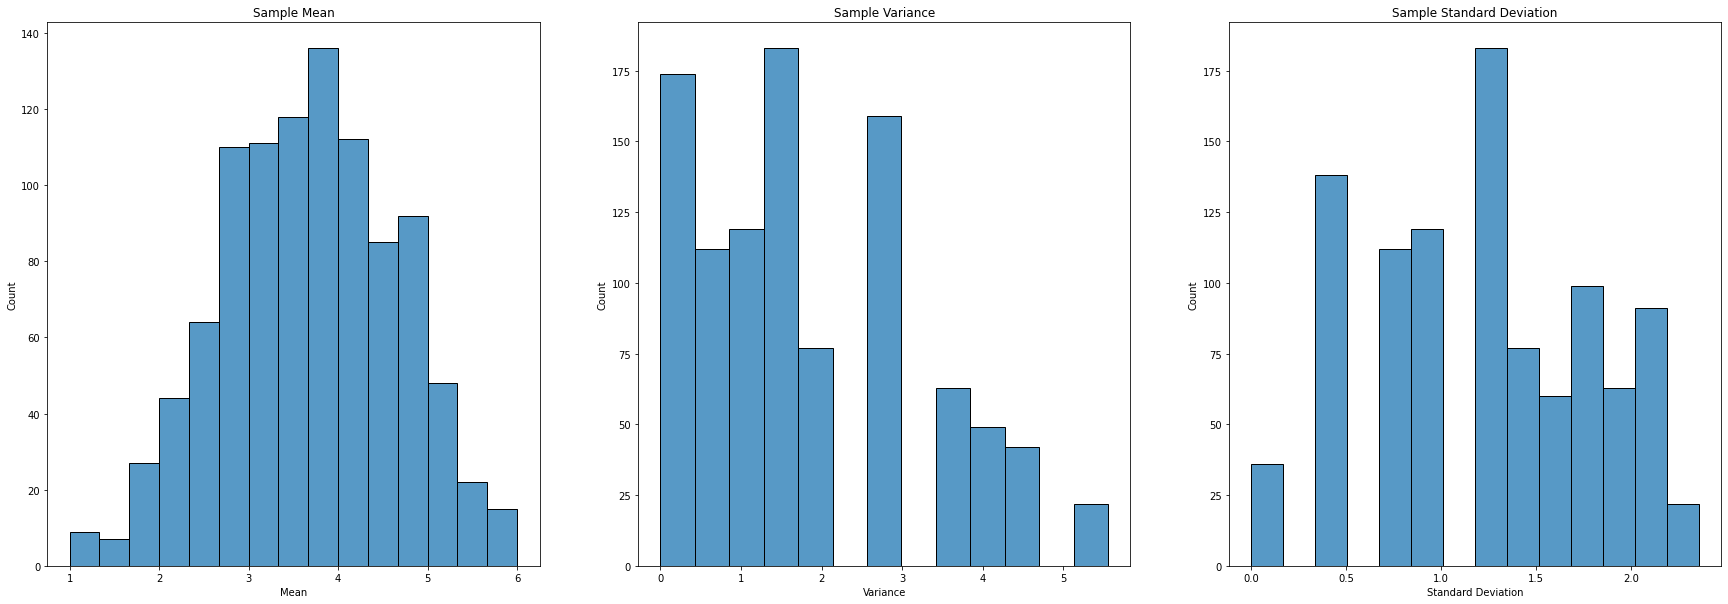

In [8]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [9]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.8448888888888892

In [10]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [11]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[2 6 3]
 [2 1 5]
 [6 6 1]
 [5 5 2]
 [5 3 3]
 [3 2 3]
 [6 5 3]
 [1 1 3]
 [2 2 2]
 [4 3 6]]


(1000000, 3)

In [12]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

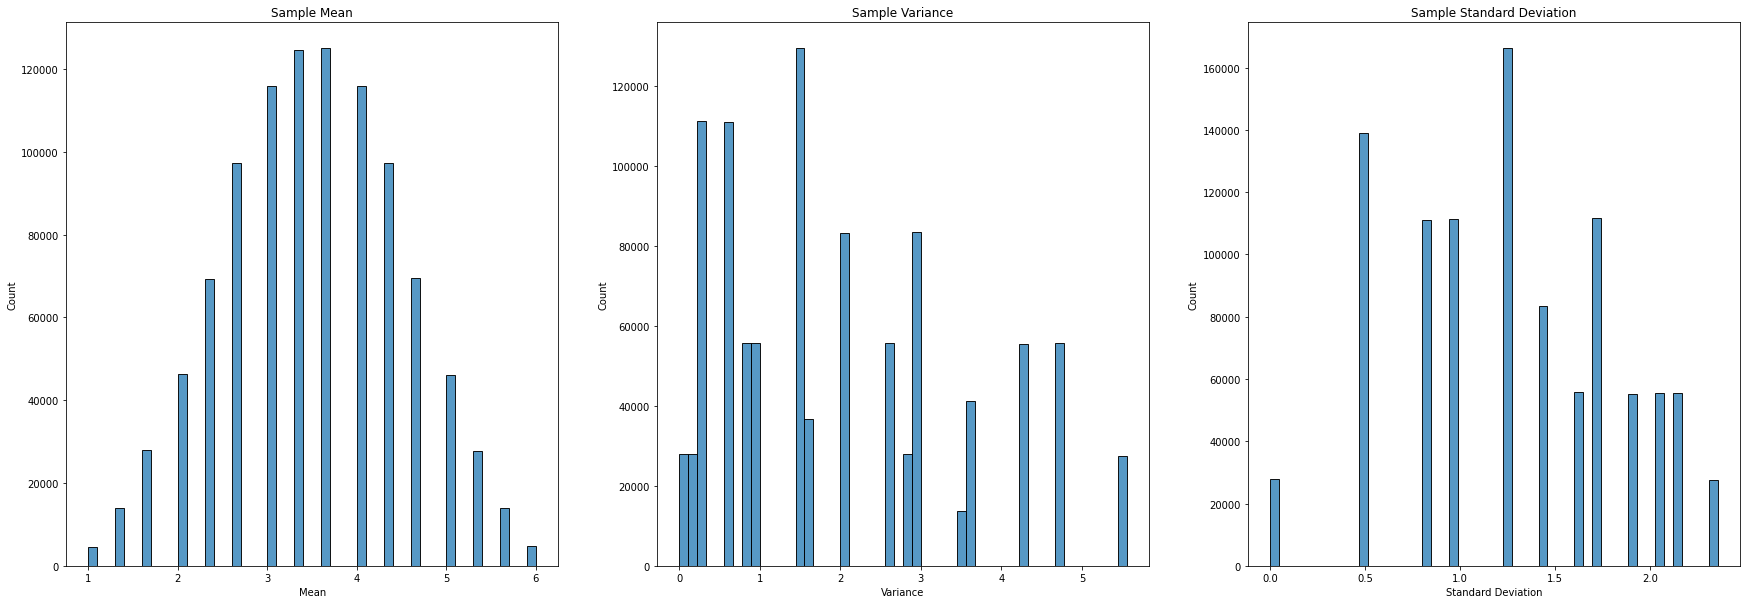

In [13]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [14]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.942617555555557

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [15]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[-1.84313939 -0.09973947 -0.22754868]
 [ 2.0202959  -0.58198559 -0.52236559]
 [ 1.52613988  1.14674807 -0.48000546]
 [-0.11906806 -0.17974425 -0.65904924]
 [-0.36192445  0.83243046  1.13066785]
 [ 1.63829147 -0.80672831  0.32912316]
 [ 0.03991215  0.14441005  1.88544724]
 [ 0.48176429 -0.38442713  1.86294918]
 [ 1.24722902 -1.14339432 -1.28070396]
 [ 1.97100355 -1.15756604  1.45695444]]


(1000000, 3)

In [16]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

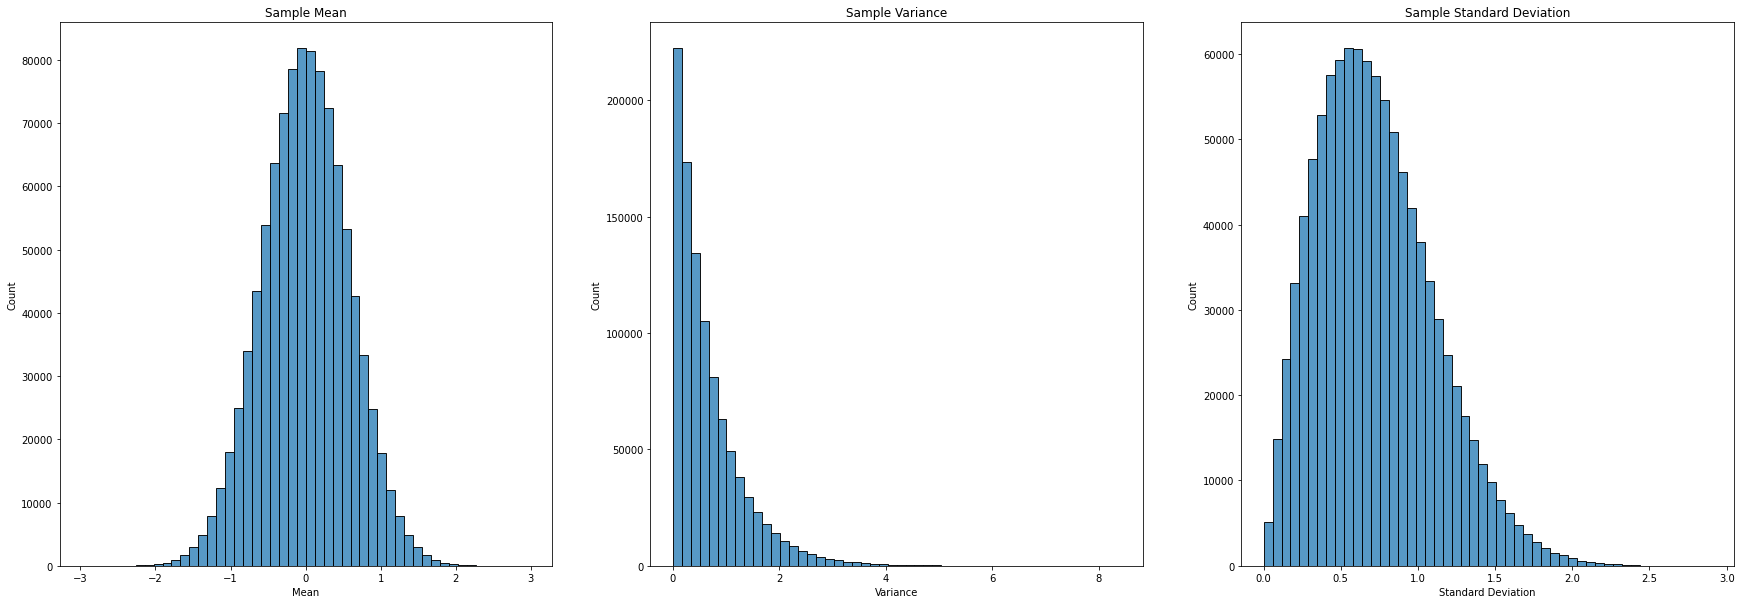

In [17]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [18]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6666749429876948

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [19]:
import pandas as pd

In [20]:
variable_n = np.arange(1, 50+1)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [21]:
variable_n_expected_var_series = pd.Series(index=variable_n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [22]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.499784
3    0.666639
4    0.748938
5    0.799801
dtype: float64

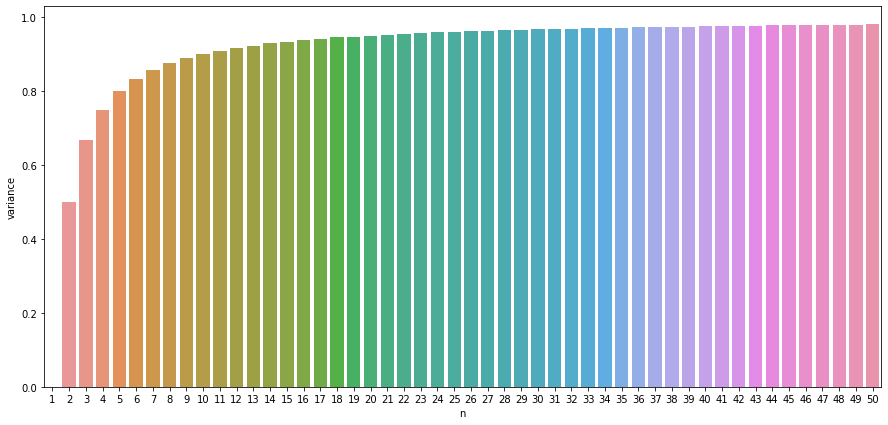

In [23]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('variance');

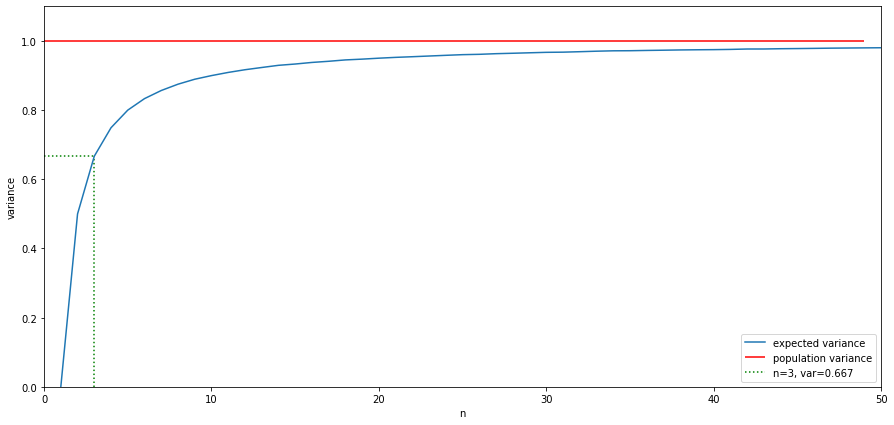

In [24]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

Look at the green dotted line, it represents n=3. We will be using it below, so remember it's variance (given in the legend).<br><br>
We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1. (but still $<$ $\sigma^2$)

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [25]:
n = 3

In [26]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([ 7.55731454, -3.62284846,  4.93015578, -7.30773045, -7.7954696 ,
        2.50521596, -9.47358995, -7.48674843, -4.77338193,  5.58715288,
        5.7176408 ,  2.24153599,  6.00366695,  3.23808468,  0.13237585,
       10.91246756,  7.83938843,  6.23896298, -3.5685239 , -7.21881312,
        6.59323825,  1.21714114,  2.40219269, -2.21653032, -3.92718802,
       10.45696337,  8.67477037,  0.02676941, -5.00218934, 10.17514312,
        6.09379364,  1.93316214, -8.37473723,  1.52370419, -9.92325705,
        4.29978747,  1.96731226,  5.40921035, -9.98575798,  6.60011186,
        2.28735386,  6.82634732, 10.82589342,  4.80137206, -6.82989594,
        7.97055742,  1.52505787,  1.37471062, -9.83485979, -2.82716889])

In [27]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [28]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

 7.557315    0.666373
-3.622848    0.667559
 4.930156    0.666490
-7.307730    0.666207
-7.795470    0.666922
dtype: float64

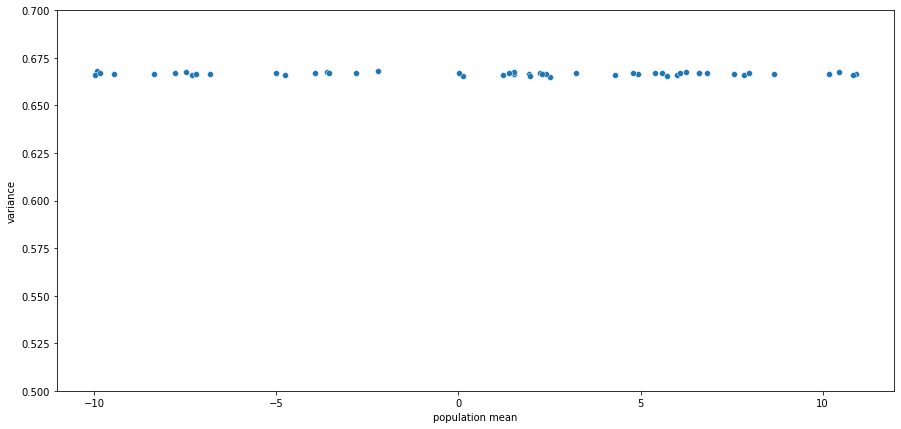

In [29]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('variance')
plt.ylim((0.5, 0.7));

The scatterplot for all  $\mu$ is showing approx. 1, so $\mu$ does not affect $E(S^2)$.
<br>
Let's zoom in on the data using lineplot.

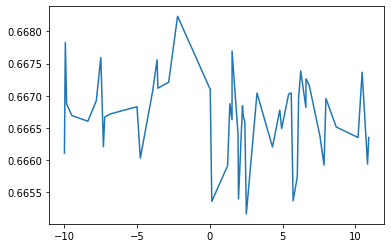

In [30]:
sns.lineplot(x=variable_mean, y=variable_mean_expected_var_series.values);

We can see from the lineplot that value of $E(S^2)$ lies in the very small interval (look at y-axis), which is a little far from 1.


### Conclusions from above two plots:

* As $n$ &#8594; $\infty$ $,$ $E(S^2)$ &#8594; 1
* $\mu$ has no effect on $E(S^2)$

### Also the two observations given below from the previous experiments stand true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$   $(This$ $one$ $is$ $particularly$ $important)$

## NOW, what if I told you that the variance we have been using till now contains bias!!

You heard it right, and the reason $E(S^2)$ is under-estimating (always having lower value than) $\sigma^2$ is that ***bias***. 

Let's look at the reason, we will look at two reasons:
* Geometric reasoning
* Algebraic reasoning

* ### Geometric reasoning:


$E[S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$ <br><br>
$\sigma^2$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n}]$

Now, let's look at few examples:

### Example-1:<br><br>
We have population of containing $6$ numbers - 1, 2, 3, 4, 5, 6.<br> Now, we take a sample containing $3$ numbers - 1, 3, 4
<br><br> $\mu$ and $\bar{X}$ have been shown in the figure below.

<img src="https://github.com/Priyam145/MLprojects/blob/main/images/eg1.png?raw=1"></img>

Now, let's recall the formulas of $\mu$ and $E[S^2]$.
* $\sigma$ is calculated by taking into account the distance between $X_i$ and $\mu$.
* $E[S^2]$ is calculated by taking into account the distance between $X_i$ and $\bar{X}$.

From the above given figure we can see that:
 * $\sum_{i=1}^n (X_i - \mu)$ will be greater than $\sum_{i=1}^n (X_i - \bar{X})$, this happens because $\mu$ is the population mean. Hence it is calculated<br>by taking into account even the end points of the entire population where as, $\bar{X}$ is only the mean of only the points contained <br>
 in that particular sample.
 <br><br><br>

### Example-2:<br><br>

<img src='https://github.com/Priyam145/MLprojects/blob/main/images/eg2.png?raw=1'></img>

Here, $\bar{X}$ and $\mu$ are approximately the same. Hence, if we calculate $E[S^2]$, then we will see that it is close to $\sigma^2$.
<br><br><br>
Hence, by looking at the two examples, we can say that:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Average distance of samples from $\bar{X}$ $\le$ Average distance of samples from $\mu$***
<br><br><br>
### As a result, $E[S^2]$ $<$ $\sigma^2$<br>
I know you might be thinking where did $=$ go, when average distances can be equal why not $E[S^2]$ and $\sigma^2$ too. The reasoning will be<br>
provided at the end of this section. 

* ### Algebraic Reasoning:

Now, the only factor that can help us in understanding why $E[S^2]$ always underestimates $\sigma^2$ is the $\sum_{i=1}^n$ term in both the equations<br><br>
Let's start with $\sum_{i=1}^n (X_i - \mu)^2$ and try to get its expression in terms of $\sum_{i=1}^n (X_i - \bar{X})^2$.

$\sum_{i=1}^n (X_i - \mu)^2$ = $\sum_{i=1}^n ((X_i - \bar{X}) + (\bar{X} - \mu))^2$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n ((X_i - \bar{X})^2 + (\bar{X} - \mu)^2 + 2(X_i - \bar{X})(X_i - \mu))$   ,where, $\sum_{i=1}^n (X_i - \bar{X}) = 0$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n (X_i - \bar{X})^2 + \sum_{i=1}^n (\bar{X} - \mu)^2$

From the above calculation we can clearly see that, $\sum_{i=1}^n (X_i - \mu)^2 > \sum_{i=1}^n (X_i - \bar{X})^2$ <br><br>
Hence, $E[S^2]$ always underestimates $\sigma^2$

## Estimating $E[S^2]$: 
### Let's make an attempt to represent $E[S^2]$ in terms of $\sigma^2, n, \mu$.

We will start by finding the expected value of error:<br><br>
$E[\sigma^2 - S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n} - \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}(\sum_{i=1}^n (X_i - \mu)^2 - \sum_{i=1}^n (X_i - \bar{X})^2)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}\sum_{i=1}^n (X_i - \mu)^2 - (X_i - \bar{X})^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{1}{n}\sum_{i=1}^n 2X_i(\bar{X} - \mu)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{2(\bar{X} - \mu)}{n}\sum_{i=1}^n X_i]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + 2(\bar{X} - \mu)\bar{X}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 + \bar{X}^2 - 2\bar{X}\mu]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[(\bar{X} - \mu)^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\frac{\sigma^2}{n}$<br><br>
<br>
Now, since $\sigma^2$ is a constant, we write $E[\sigma^2 - S^2]$ = $\sigma^2 - E[S^2]$<br><br>
Hence, $E[S^2]$ = $\sigma^2$ - $\frac{\sigma^2}{n}$<br><br>
When we simplify the equation, we get:<br><br>
### $E[S^2]$ = $\frac{n-1}{n}\sigma^2$ &#8594; Now, we see why we didn't put = sign in $E[S^2]$ $<$ $\sigma^2$<br><br>
<br>Now, coming to out main topic ***Bias***:<br><br>
As we can, $E[S^2]$ is always less than $\sigma^2$, it is not sometimes greater or less than, but always less than. So, this systematic error is known as ***bias***.<br><br>

Inorder to remove this bias, we define an **unbiased** variance $E[S_{n-1}^2]$<br><br>
$E[S_{n-1}^2]$ = $\sigma^2$, (Let's call this **$eq.1$** for sometime) and <br><br>
to distinguish the usual **biased** variance, we denote it as $E[S_{n}^2]$<br><br>
$E[S_n^2]$ = $\frac{n-1}{n}\sigma^2$ (Let's call this **$eq.2$** for sometime)<br><br><br>
We know:<br><br>
$S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$, so using $eq.1$ & $eq.2$ (just recall properties of expectation)<br><br>
$E[S_{n-1}^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}]$ and $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$<br><br><br>
* **Remember, the experiment where we plotted a graph between $E[S^2]$ and $n$, and I told you to note down the value for n=3. Now, put the value of n=3 in $eq.2$ and you will understand why we got that graph.**

### Now, that we have two type variances - $S_n^2$ and $S_{n-1}^2$, when to use which?<br><br>
### Answer: <br>
* When we want to calculate **$Population$ $Variance$**, then we will use **$S_n^2$**.
* When we want to calculate **$Sample$ $Variance$**, then we will use **$S_{n-1}^2$**.

Now, let's go to our example were everthing started:

### For $n$:

In [31]:
variable_n_unbiased_expected_var_series = pd.Series(index=variable_n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [32]:
for n in variable_n:
    variable_n_unbiased_samples = np.random.normal(size=(10**6, n))
    variable_n_unbiased_var_dist = np.var(variable_n_unbiased_samples, axis=1, ddof=1)      # ddof=1 tells numpy to calculate sample varance
    variable_n_unbiased_expected_var_series[n] = np.mean(variable_n_unbiased_var_dist)

variable_n_unbiased_expected_var_series.iloc[:5]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


1         NaN
2    1.000180
3    1.000053
4    0.999787
5    0.999992
dtype: float64

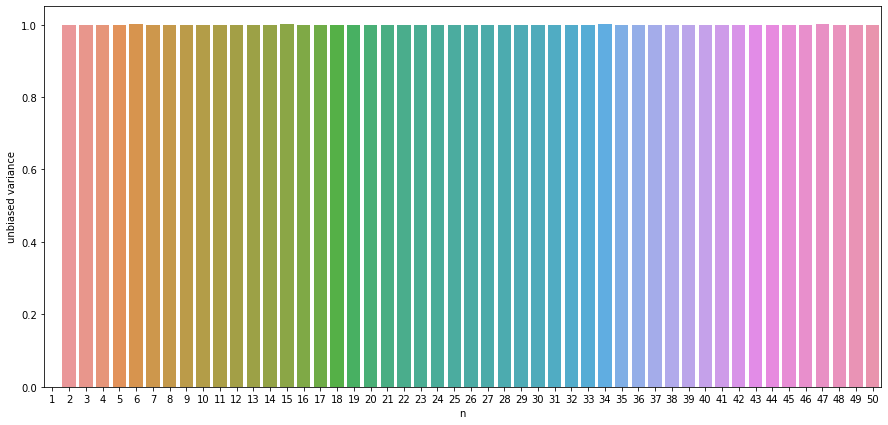

In [33]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('unbiased variance');

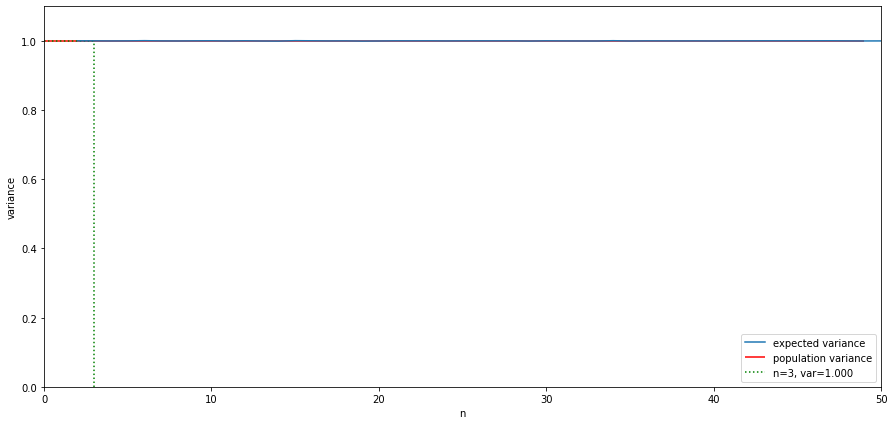

In [34]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_unbiased_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_unbiased_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_unbiased_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

### For $\mu$:

In [35]:
variable_mean_unbiased_expected_var_series = pd.Series(index=variable_mean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [36]:
for mean in variable_mean:
    variable_mean_unbiased_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_unbiased_var_dist = np.var(variable_mean_unbiased_samples, axis=1, ddof=1)
    variable_mean_unbiased_expected_var_series[mean] = np.mean(variable_mean_unbiased_var_dist)

variable_mean_unbiased_expected_var_series.iloc[:5]

 7.557315    0.999710
-3.622848    0.999947
 4.930156    0.999911
-7.307730    1.000037
-7.795470    0.999753
dtype: float64

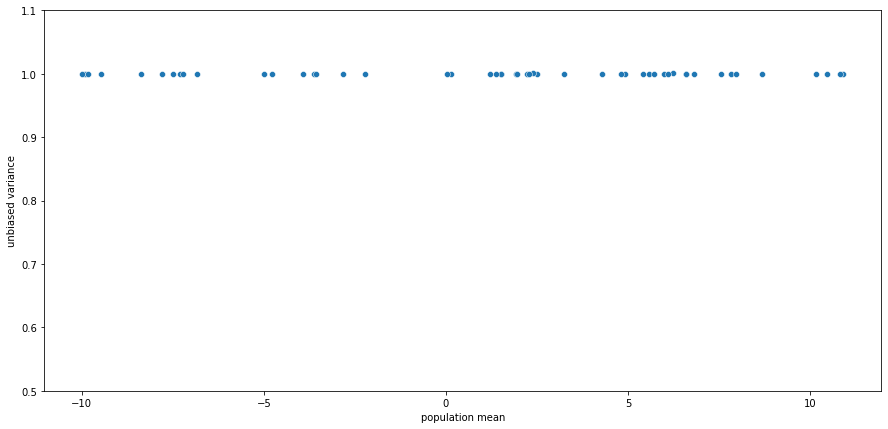

In [37]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_unbiased_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('unbiased variance')
plt.ylim((0.5, 1.1));

### *This time we can see that for all the graphs, the output is correct. (extremely close to population variance)* <br><br>
* For $variable$ $n$ and $\mu$, the output is a straight line $y$ = $1$ (approx.)

## ***Conclusion***:
* $E(S_n^2)$ & $E(S_{n-1}^2)$ are biased and unbiased estimates of $\sigma^2$ respectively.<br><br>
* If we want to calculate $\sigma^2$ (population variance), use $S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$<br><br>
* If we want to calculate $E[S^2]$ (expected sample variance), use $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$

In [38]:
from scipy.stats import chi2

In [97]:
def axis_generator(rows, cols, variables, variables_limit):

    index_tuple = tuple()
    for row in np.arange(rows):
        index_tuple += tuple(zip(np.repeat(row, cols),np.arange(cols)))
    multilvl_index = pd.MultiIndex.from_tuples(index_tuple, names=('row', 'col'))
    if len(variables) >= variables_limit:
        axis = pd.Series(variables[:variables_limit], index=multilvl_index)
    else:
        variables_extra = np.empty(shape=(0), dtype=variables.dtype)
        remaining = variables_limit - len(variables)
        while(remaining>0):
            if remaining >= len(variables):
                variables_extra = np.append(variables_extra, np.repeat(variables, 1))
                print(variables_extra,'&', len(variables_extra))
                print(remaining)
            else:
                variables_extra = np.append(variables_extra, np.repeat(variables[:variables_limit], 1))
            remaining = variables_limit - len(variables_extra)
        print('final:', np.append(variables, variables_extra))
        axis = pd.Series(np.append(variables, variables_extra), index=multilvl_index)
    return axis

alpha_axis_generator = axis_generator(rows=2, cols=3, variables=np.array([1]), variables_limit=2*3)
alpha_axis_generator

[1] & 1
5
[1 1] & 2
5
[1 1 1] & 3
4
[1 1 1 1] & 4
3
[1 1 1 1 1] & 5
2
[1 1 1 1 1 1] & 6
1
final: [1 1 1 1 1 1 1]


ValueError: ignored

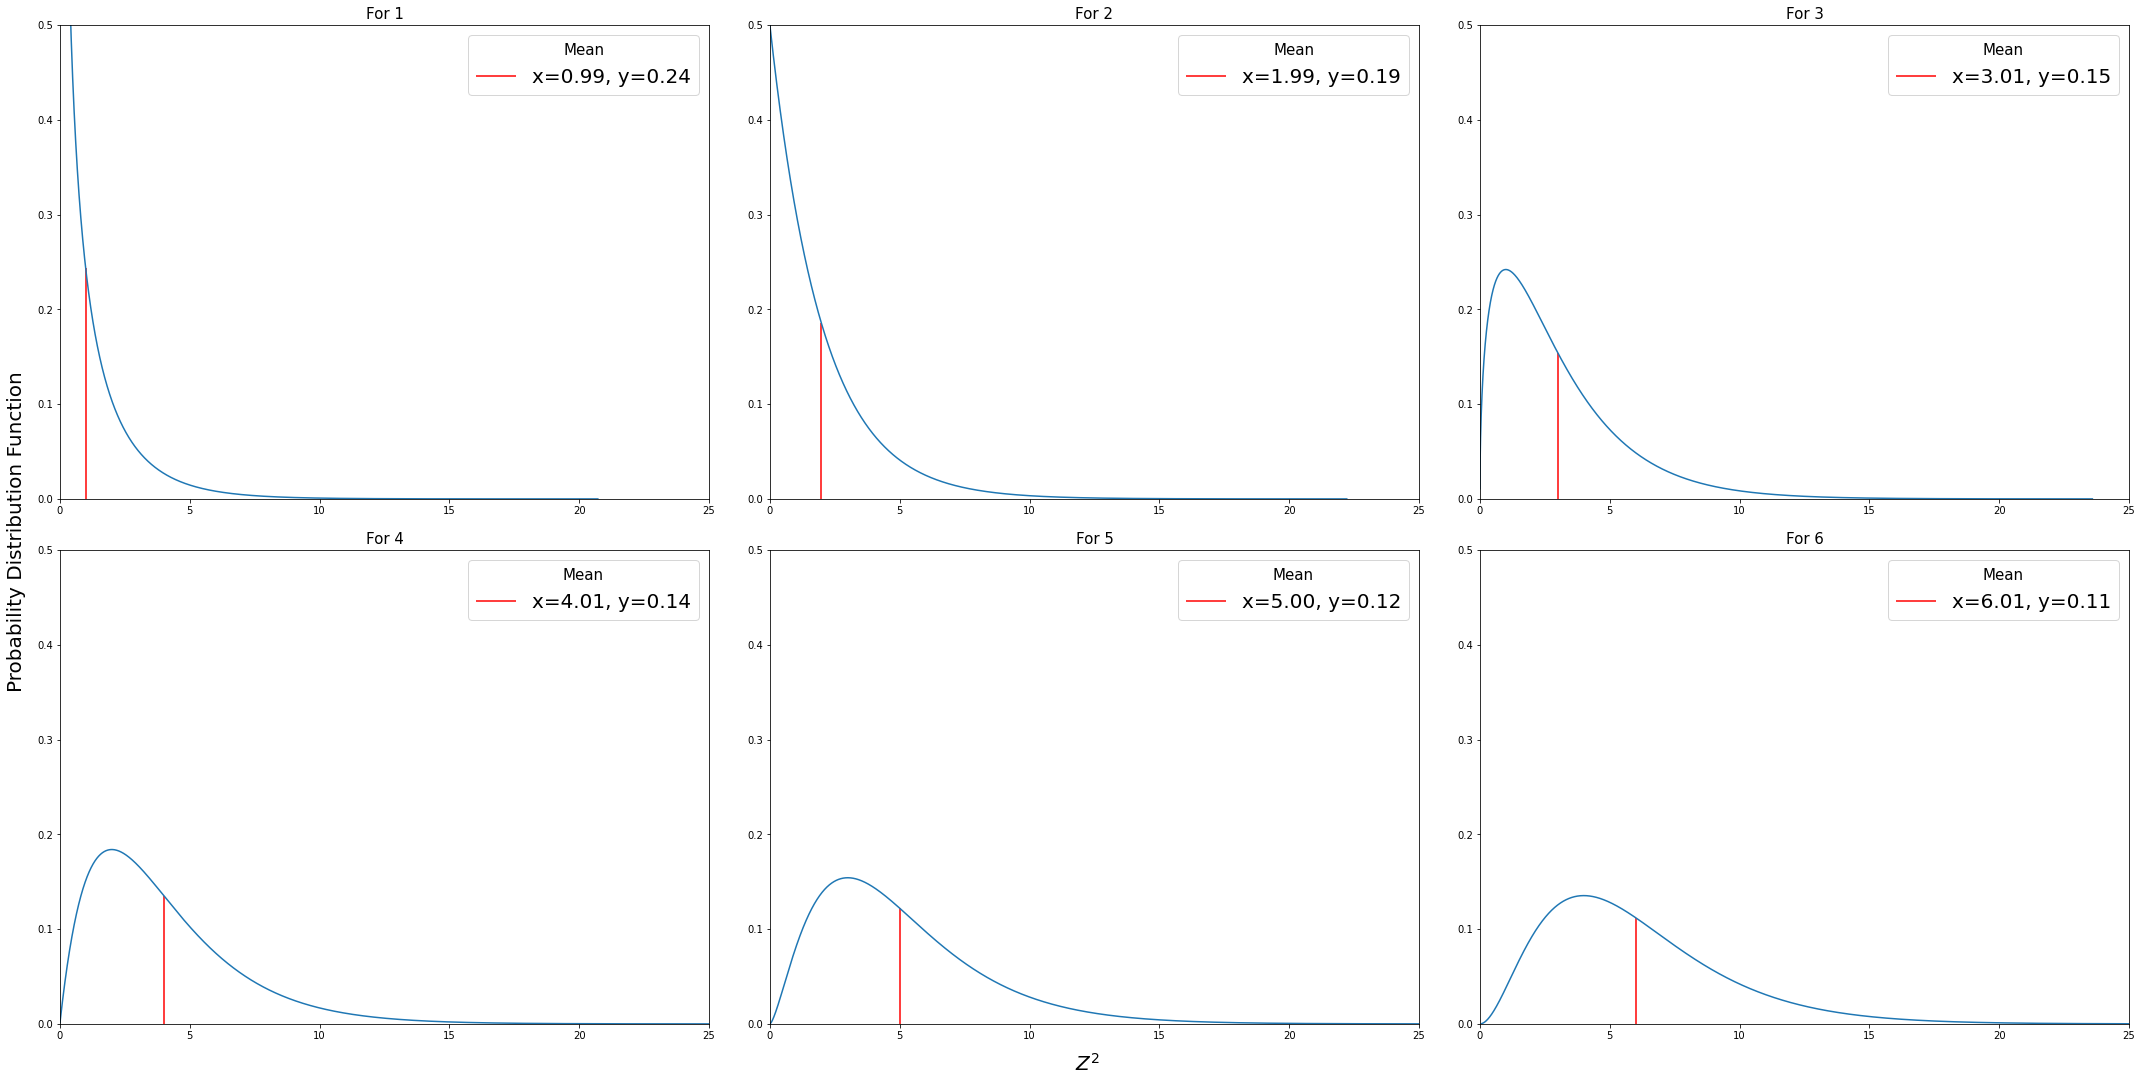

In [40]:
srows, cols = 2, 3
fig, axs = plt.subplots(figsize=(30, 15), nrows=rows, ncols=cols)
fig.patch.set_facecolor("white")
fig.text(0.0001, 0.5, 'Probability Distribution Function', va='center', rotation='vertical', size=20)
fig.text(0.5, 0.0001, r'$Z^2$', ha='center', size=20)
fig.tight_layout(pad=3)

n_axis_generator = axis_generator(rows=rows, cols=cols, variables=variable_n, variables_limit=rows*cols)

for ax_tup, n in n_axis_generator.items():
    row, col = ax_tup
    z_samples = np.array([np.random.normal(size=(10**5)) for i in np.arange(n)])
    q_dist = np.sum(z_samples**2, axis=0)
    q_pdf = chi2.pdf(q_dist, df=n)
    sns.lineplot(x=q_dist, y=q_pdf, ax=axs[row, col])
    q_mean=np.mean(q_dist)
    q_mean_pdf=chi2.pdf(q_mean, df=n)
    axs[row, col].vlines(x=q_mean,
                         ymin=0,
                         ymax=q_mean_pdf,
                         colors='red',
                         label=f'x={q_mean:.2f}, y={q_mean_pdf:.2f}')
    axs[row, col].set_title(f'For {n}', size=15)
    axs[row, col].set_ylabel('')
    axs[row, col].set_xlim(xmin=0, xmax=25)
    axs[row, col].set_ylim(ymin=0, ymax=0.5)
    axs[row, col].legend(loc='upper right', 
                         title=f'Mean',
                         fontsize=20,
                         title_fontsize=15)

(100000,)


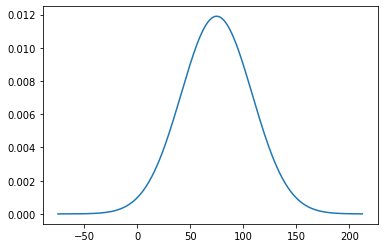

In [41]:
temp_samples = np.array([np.random.uniform(-10, 20, size=(10**5)) for i in np.arange(15)])
temp_sum_samples = np.sum(temp_samples, axis=0)
print(temp_sum_samples.shape)
temp_dist = norm.pdf(temp_sum_samples, loc=np.mean(temp_sum_samples), scale=np.std(temp_sum_samples))
sns.lineplot(x=temp_sum_samples, y=temp_dist)

(100000,)


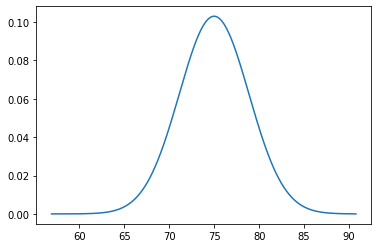

In [42]:
temp_norm_samples = np.array([np.random.normal(loc=5, scale=1, size=(10**5)) for i in np.arange(15)])
temp_norm_sum_samples = np.sum(temp_norm_samples, axis=0)
print(temp_norm_sum_samples.shape)
temp_norm_dist = norm.pdf(temp_norm_sum_samples, loc=np.mean(temp_norm_sum_samples), scale=np.std(temp_norm_sum_samples))
sns.lineplot(x=temp_norm_sum_samples, y=temp_norm_dist)

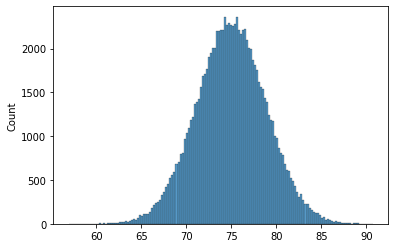

In [43]:
sns.histplot(temp_norm_sum_samples)

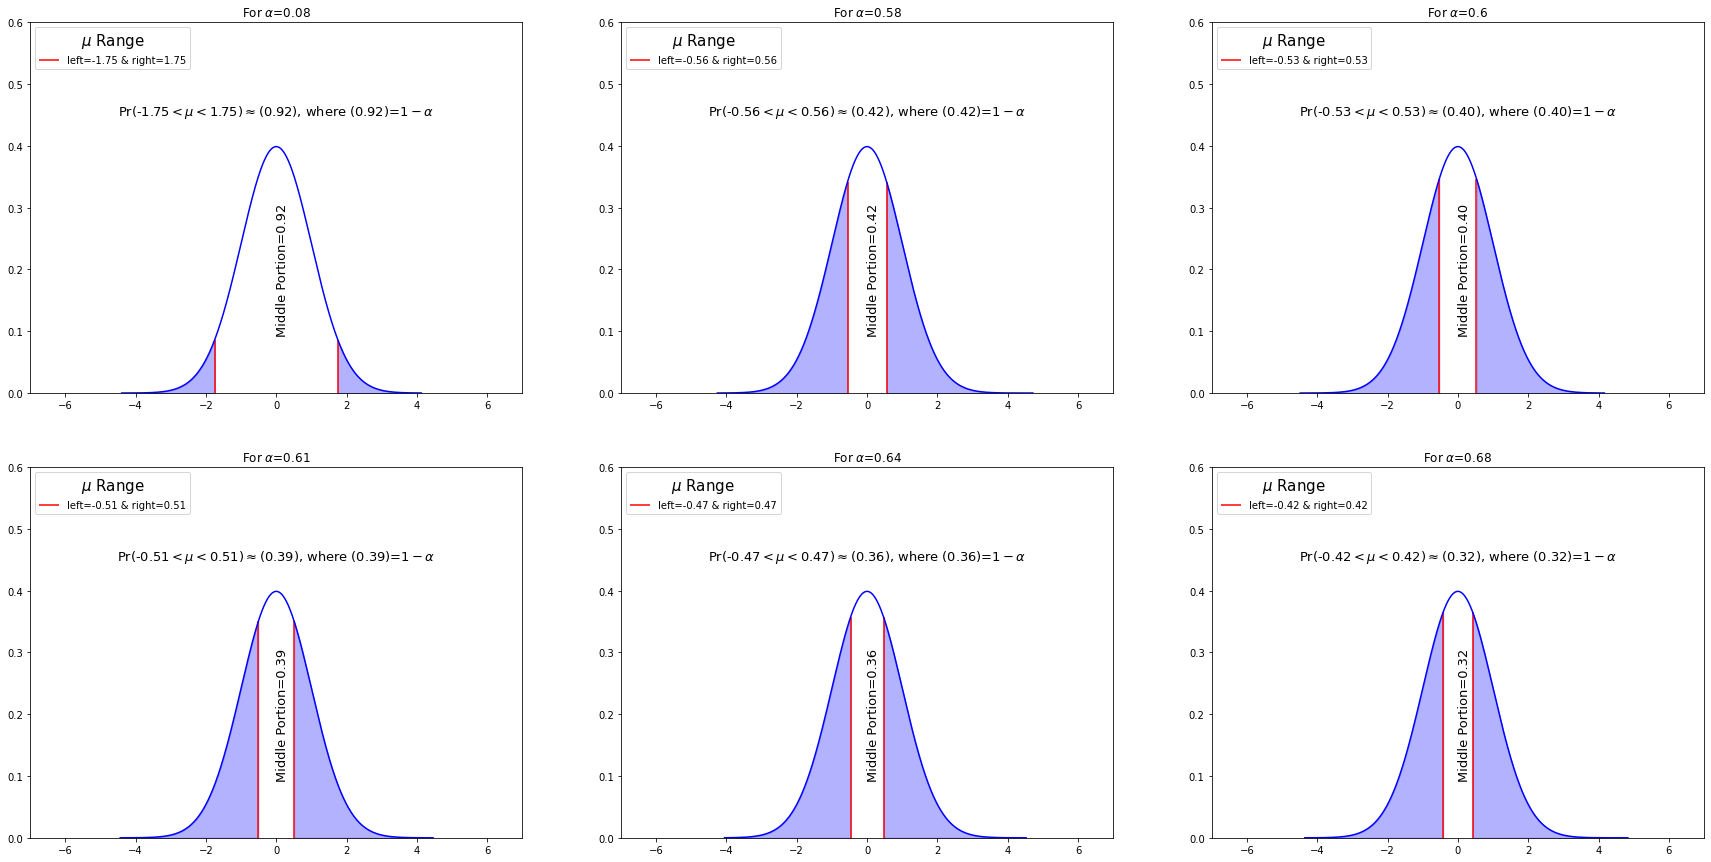

In [44]:
rows, cols = 2, 3
alpha_values = np.sort(np.random.uniform(0, 1, size=10))
fig, axs = plt.subplots(figsize=(30, 15), nrows=rows, ncols=cols)
fig.set_facecolor('white')
alpha_axis_generator = axis_generator(rows=rows, cols=cols, variables=alpha_values, variables_limit=rows*cols)

for ax_tup, alpha in alpha_axis_generator.items():
    row, col = ax_tup
    dummy_points = np.random.normal(size=(10**5))
    dummy_dist = norm.pdf(dummy_points)
    
    
    sns.lineplot(x=dummy_points, y=dummy_dist, ax=axs[row, col], color='blue')
    axs[row, col].set_title("For {}={}".format(r'$\alpha$', round(alpha, 2)))
    axs[row, col].set_ylim(ymin=0, ymax=0.6)
    axs[row, col].set_xlim(xmin=-7, xmax=7)
    
    li = axs[row, col].lines[0]
    x1, y1 = li.get_xydata()[:, 0], li.get_xydata()[:, 1]
    left_tail_point = norm.ppf(alpha/2)
    right_tail_point = norm.ppf(1-alpha/2)
    middle_area = 2*(0.5 - norm.cdf(left_tail_point))
    
    
    axs[row, col].fill_between(x1[x1<left_tail_point], y1[x1<left_tail_point], alpha=0.3, color='blue')
    axs[row, col].fill_between(x1[x1>right_tail_point], y1[x1>right_tail_point], alpha=0.3, color='blue')
    axs[row, col].vlines(x=[left_tail_point, right_tail_point],
                         ymin=0,
                         ymax=[norm.pdf(left_tail_point), norm.pdf(right_tail_point)],
                         color='red',
                         label=f'left={left_tail_point:.2f} & right={right_tail_point:.2f}')
    
    axs[row, col].legend(loc='upper left',
                         title='{pop_mean} Range'.format(pop_mean=r'$\mu$'),
                         title_fontsize='15')
    
    axs[row, col].text(0, 0.20,
                       f'Middle Portion={middle_area:.2f}',
                       va='center',
                       rotation='vertical',
                       size=13)
    
    axs[row, col].text(0, 0.45, 'Pr({left:.2f}{pop_mean}{right:.2f}){approx}({alpha_val:.2f}), where ({alpha_val:.2f})={one_alpha}'.format(left=left_tail_point,
                                                                                                                                    pop_mean=r'$<\mu<$',
                                                                                                                                    right=right_tail_point,
                                                                                                                                    approx=r'$\approx$',
                                                                                                                                    one_alpha=r'$1-\alpha$',
                                                                                                                                    alpha_val=1-alpha),
                       ha='center',
                       size=13)

# T-Distribution:<br>
We are going to use the formula-&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T_{n-1} = \sqrt{n}\frac{\bar{X}-\mu}{S_{n-1}}$

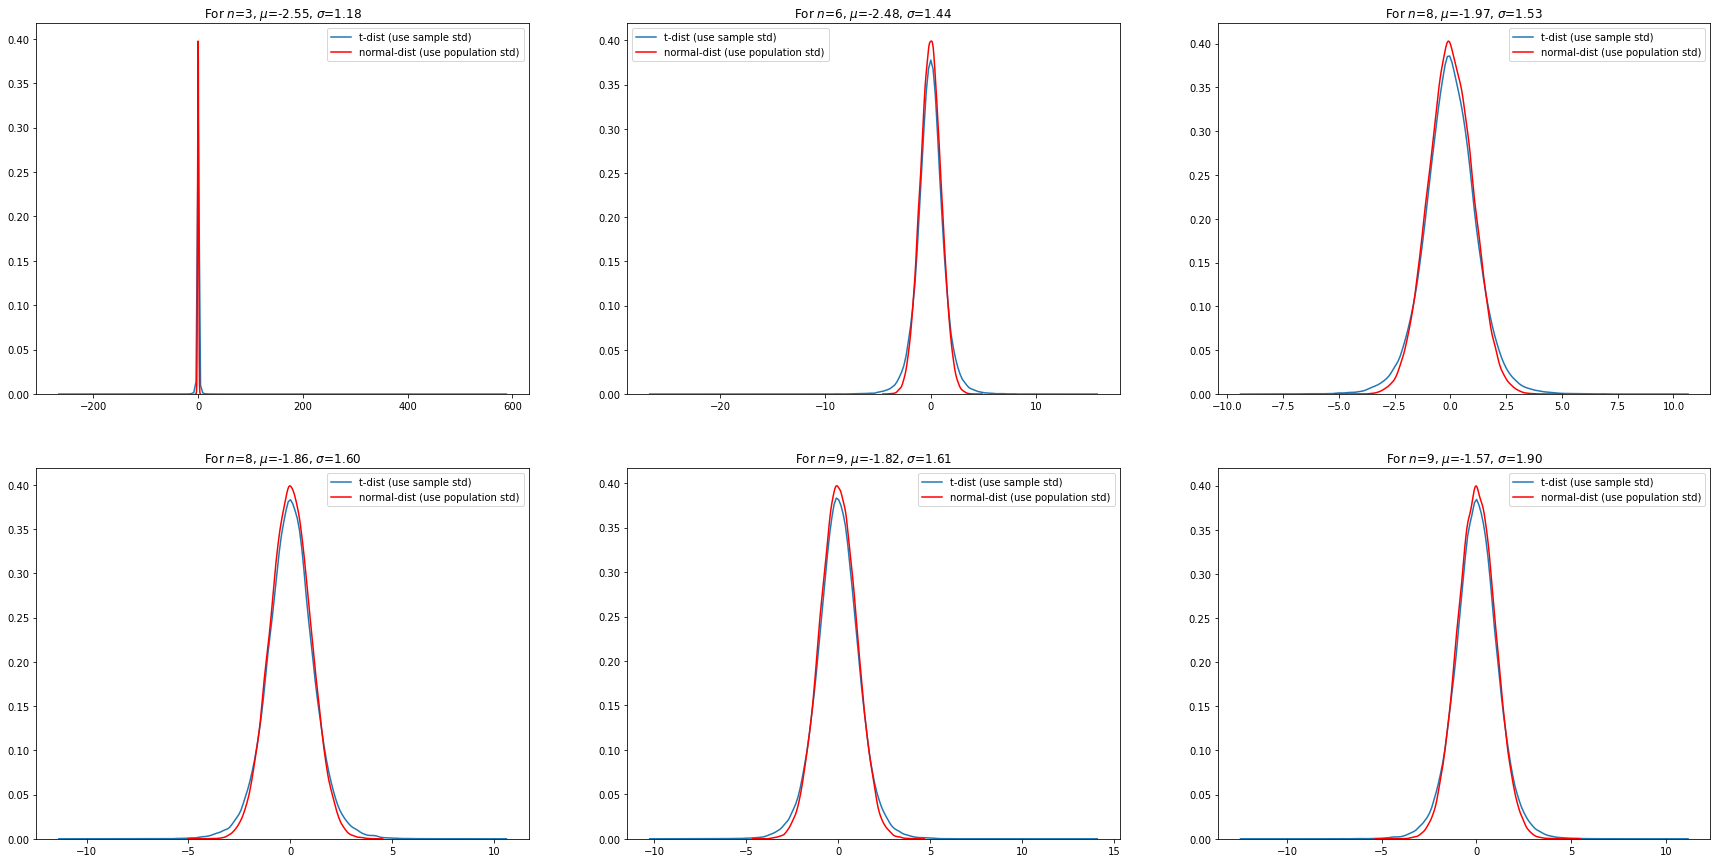

In [66]:
size=1
sample_size = np.sort(np.random.randint(3, 15, size=size))
pop_mean, pop_std = np.sort(np.random.uniform(-3, 3, size=size)), np.sort(np.random.uniform(1, 3, size=size))

rows, cols = 2, 3
fig, axs = plt.subplots(figsize=(30, 15), nrows=rows, ncols=cols)
fig.set_facecolor('white')

i_axis_generator = axis_generator(rows=rows, cols=cols, variables=np.arange(size), variables_limit=rows*cols)

for axs_tup, i in i_axis_generator.items():
    row, col = axs_tup
    t_samples = np.random.normal(loc=pop_mean[i], scale=pop_std[i], size=(10**5, sample_size[i]))
    t_samples_mean = np.mean(t_samples, axis=1)
    t_samples_std = np.std(t_samples, axis=1, ddof=1)
    t_samples_t_statistic_sample_std= sqrt(sample_size[i])*((t_samples_mean - pop_mean[i])/t_samples_std)
    t_samples_t_statistic_pop_std = sqrt(sample_size[i])*((t_samples_mean - pop_mean[i])/pop_std[i])
    
    sns.kdeplot(x=t_samples_t_statistic_sample_std,  
                 ax=axs[row, col],
                 alpha=0.5, 
                 label='t-dist (use sample std)')
    
    sns.kdeplot(x=t_samples_t_statistic_pop_std, 
                 ax=axs[row, col], 
                 color='red', 
                 alpha=0.3,
                 label='normal-dist (use population std)')
    
    axs[row, col].set_title("For {n}={n_value}, {mu}={mu_value:.2f}, {sigma}={sigma_value:.2f}".format(n=r'$n$',
                                                                                           n_value=sample_size[i], 
                                                                                           mu=r'$\mu$',
                                                                                           mu_value=pop_mean[i], 
                                                                                           sigma=r'$\sigma$',
                                                                                           sigma_value=pop_std[i]))
    axs[row, col].set_ylabel('')
    axs[row, col].legend()